<a href="https://colab.research.google.com/github/shivanimachewad/express/blob/master/Copy_of_ML_workshop_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and setup

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# url = 'https://docs.google.com/spreadsheets/d/ABC123XYZ456/export?format=csv'
url = 'https://docs.google.com/spreadsheets/d/1o8Dap7BauoPZmJQ6nieezQ4Yb7fHtEp2DrlDQto3F_0/export?format=csv'
df = pd.read_csv(url)

## Explore the dataframe

In [62]:
df.columns

Index(['Timestamp', 'Age', 'Gender', '⁠Time Spent Studying (per day)',
       'Average Hours of Sleep per Night',
       '⁠Physical Exercise/Sports Participation (per day)',
       'Productivity on a Scale of 1-10', 'Stress Levels on a Scale of 1-5',
       '⁠Pointer (Most Recent Semester)'],
      dtype='object')

In [63]:

df.head()

,Timestamp,Age,Gender,⁠Time Spent Studying (per day),Average Hours of Sleep per Night,⁠Physical Exercise/Sports Participation (per day),Productivity on a Scale of 1-10,Stress Levels on a Scale of 1-5,⁠Pointer (Most Recent Semester)
0,8/22/2024 14:35:59,19,Male,4,6,1,7,1,8
1,8/22/2024 14:36:07,20,Male,2,5,Yes,7,4,6.55
2,8/22/2024 14:36:15,20,Female,4,8,1,5,3,7.5
3,8/22/2024 14:36:42,20,Male,3 hr,7,1hr,7,3,9.55
4,8/22/2024 14:36:48,20,Female,1 hours,10 hours,0 hours,7,4,9.9


# Data Cleaning

In [64]:
def clean_data(df):
    # Ensure all column names are strings and clean them up
    df.columns = [str(col).strip().replace('⁠', '').replace(' ', '_') for col in df.columns]

    df['Time_Spent_Studying_(per_day)'] = df['Time_Spent_Studying_(per_day)'].astype(str).str.extract('(\d+)').astype(float)
    #df.loc[df['Physical_Exercise/Sports_Participation_(per_day)'] > 15, 'Physical_Exercise/Sports_Participation_(per_day)'] /= 60

    # Convert relevant columns directly to numeric
    df['Productivity_on_a_Scale_of_1-10'] = pd.to_numeric(df['Productivity_on_a_Scale_of_1-10'], errors='coerce')
    df['Pointer_(Most_Recent_Semester)'] = pd.to_numeric(df['Pointer_(Most_Recent_Semester)'], errors='coerce')
    df['Stress_Levels_on_a_Scale_of_1-5'] = pd.to_numeric(df['Stress_Levels_on_a_Scale_of_1-5'], errors='coerce')


    # Replace missing values with 0 for exercise participation
    df['Physical_Exercise/Sports_Participation_(per_day)'].fillna(0, inplace=True)
    df['Pointer_(Most_Recent_Semester)'].fillna(df['Pointer_(Most_Recent_Semester)'].mean(), inplace=True)

    df['Average_Hours_of_Sleep_per_Night'] = df['Average_Hours_of_Sleep_per_Night'].astype(str).str.extract('(\d+)').astype(float)

    df['Physical_Exercise/Sports_Participation_(per_day)'] = df['Physical_Exercise/Sports_Participation_(per_day)'].astype(str).str.extract('(\d+)').astype(float)
    return df



In [65]:
df_cleaned = clean_data(df)

In [66]:
df_cleaned

,Timestamp,Age,Gender,Time_Spent_Studying_(per_day),Average_Hours_of_Sleep_per_Night,Physical_Exercise/Sports_Participation_(per_day),Productivity_on_a_Scale_of_1-10,Stress_Levels_on_a_Scale_of_1-5,Pointer_(Most_Recent_Semester)
0,8/22/2024 14:35:59,19,Male,4.0,6.0,1.0,7,1,8.000
1,8/22/2024 14:36:07,20,Male,2.0,5.0,NaN,7,4,6.550
2,8/22/2024 14:36:15,20,Female,4.0,8.0,1.0,5,3,7.500
3,8/22/2024 14:36:42,20,Male,3.0,7.0,1.0,7,3,9.550
4,8/22/2024 14:36:48,20,Female,1.0,10.0,0.0,7,4,9.900
...,...,...,...,...,...,...,...,...,...
108,8/22/2024 14:46:05,20,Male,2.0,8.0,1.0,5,3,6.000
109,8/22/2024 14:51:42,21,Male,1.0,8.0,1.0,8,3,9.100
110,8/22/2024 15:26:36,19,Male,2.0,8.0,NaN,1,1,8.200
111,8/22/2024 20:59:57,20,Male,4.0,5.0,1.0,7,2,8.292


In [67]:
df_cleaned = df_cleaned.drop("Timestamp", axis=1)
df_cleaned = df_cleaned.drop("Physical_Exercise/Sports_Participation_(per_day)", axis=1)

# Data exploration

In [68]:
print(df_cleaned.describe())

              Age  Time_Spent_Studying_(per_day)  \
count  113.000000                     113.000000   
mean    20.194690                       3.504425   
std      2.987648                       4.075458   
min     18.000000                       0.000000   
25%     20.000000                       2.000000   
50%     20.000000                       3.000000   
75%     20.000000                       4.000000   
max     50.000000                      30.000000   

       Average_Hours_of_Sleep_per_Night  Productivity_on_a_Scale_of_1-10  \
count                        113.000000                       113.000000   
mean                           7.336283                         6.141593   
std                            1.795881                         1.985965   
min                            3.000000                         1.000000   
25%                            6.000000                         5.000000   
50%                            7.000000                         6.000000   

### Explore individual features

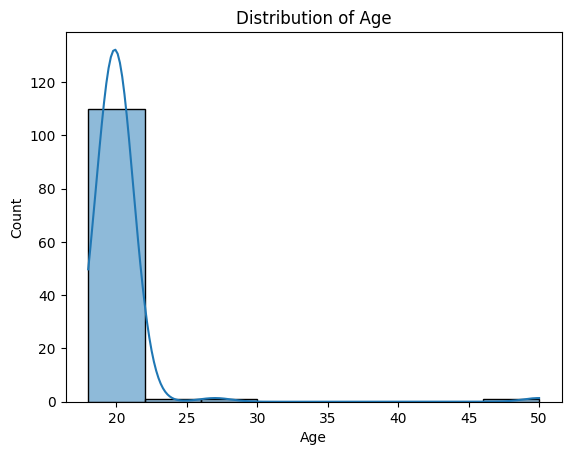

In [69]:
# Distribution of Age
sns.histplot(df_cleaned['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

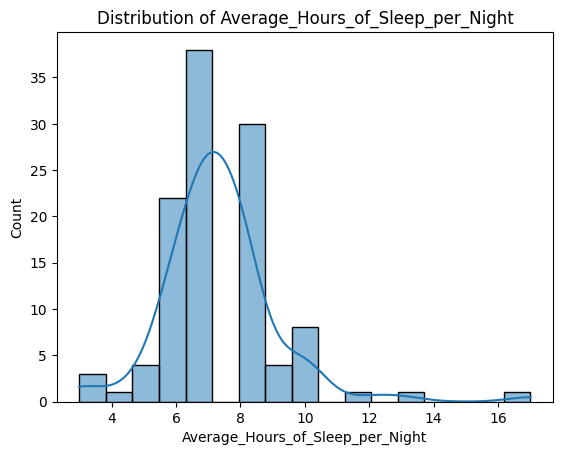

In [70]:
sns.histplot(df_cleaned['Average_Hours_of_Sleep_per_Night'], kde=True)
plt.title('Distribution of Average_Hours_of_Sleep_per_Night')
plt.show()

In [71]:
sns.histplot(df_cleaned['Physical_Exercise/Sports_Participation_(per_day)'], kde=True)
plt.title('Distribution of Physical_Exercise/Sports_Participation_(per_day)')
plt.show()

KeyError: 'Physical_Exercise/Sports_Participation_(per_day)'

### Explore pair of features

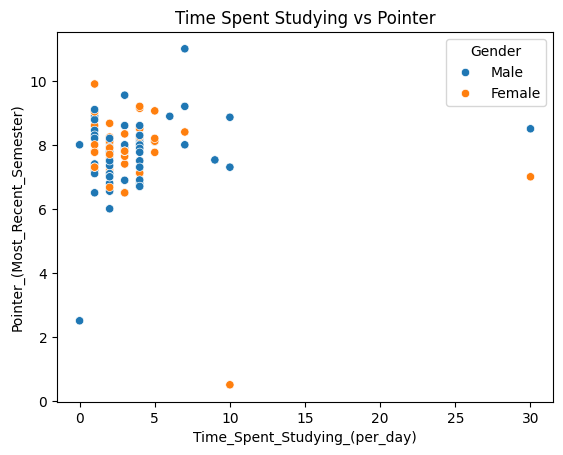

In [72]:
# Scatter plot between Time Spent Studying and Pointer
sns.scatterplot(data=df_cleaned, x='Time_Spent_Studying_(per_day)', y='Pointer_(Most_Recent_Semester)', hue='Gender')
plt.title('Time Spent Studying vs Pointer')
plt.show()

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Gender'])
    ], remainder = 'passthrough'
)


In [74]:
df_cleaned = pd.DataFrame(preprocessor.fit_transform(df_cleaned), columns=preprocessor.get_feature_names_out())

In [75]:
df_cleaned.corr()

,encoder__Gender_Female,encoder__Gender_Male,remainder__Age,remainder__Time_Spent_Studying_(per_day),remainder__Average_Hours_of_Sleep_per_Night,remainder__Productivity_on_a_Scale_of_1-10,remainder__Stress_Levels_on_a_Scale_of_1-5,remainder__Pointer_(Most_Recent_Semester)
encoder__Gender_Female,1.000000,-1.000000,0.080462,-0.003115,0.049213,0.069747,0.176862,0.031222
encoder__Gender_Male,-1.000000,1.000000,-0.080462,0.003115,-0.049213,-0.069747,-0.176862,-0.031222
remainder__Age,0.080462,-0.080462,1.000000,0.153186,0.267255,-0.275553,-0.164948,-0.517684
remainder__Time_Spent_Studying_(per_day),-0.003115,0.003115,0.153186,1.000000,-0.020944,-0.088330,-0.024895,-0.014528
remainder__Average_Hours_of_Sleep_per_Night,0.049213,-0.049213,0.267255,-0.020944,1.000000,-0.211239,-0.274409,-0.343699
remainder__Productivity_on_a_Scale_of_1-10,0.069747,-0.069747,-0.275553,-0.088330,-0.211239,1.000000,0.058387,0.342067
remainder__Stress_Levels_on_a_Scale_of_1-5,0.176862,-0.176862,-0.164948,-0.024895,-0.274409,0.058387,1.000000,-0.035094
remainder__Pointer_(Most_Recent_Semester),0.031222,-0.031222,-0.517684,-0.014528,-0.343699,0.342067,-0.035094,1.000000


# Model Training

In [76]:
df_cleaned.head()

,encoder__Gender_Female,encoder__Gender_Male,remainder__Age,remainder__Time_Spent_Studying_(per_day),remainder__Average_Hours_of_Sleep_per_Night,remainder__Productivity_on_a_Scale_of_1-10,remainder__Stress_Levels_on_a_Scale_of_1-5,remainder__Pointer_(Most_Recent_Semester)
0,0.0,1.0,19.0,4.0,6.0,7.0,1.0,8.00
1,0.0,1.0,20.0,2.0,5.0,7.0,4.0,6.55
2,1.0,0.0,20.0,4.0,8.0,5.0,3.0,7.50
3,0.0,1.0,20.0,3.0,7.0,7.0,3.0,9.55
4,1.0,0.0,20.0,1.0,10.0,7.0,4.0,9.90


In [77]:
df_cleaned.head()
#df_cleaned = df_cleaned.drop("remainder__Timestamp", axis=1)
df_cleaned.head()

,encoder__Gender_Female,encoder__Gender_Male,remainder__Age,remainder__Time_Spent_Studying_(per_day),remainder__Average_Hours_of_Sleep_per_Night,remainder__Productivity_on_a_Scale_of_1-10,remainder__Stress_Levels_on_a_Scale_of_1-5,remainder__Pointer_(Most_Recent_Semester)
0,0.0,1.0,19.0,4.0,6.0,7.0,1.0,8.00
1,0.0,1.0,20.0,2.0,5.0,7.0,4.0,6.55
2,1.0,0.0,20.0,4.0,8.0,5.0,3.0,7.50
3,0.0,1.0,20.0,3.0,7.0,7.0,3.0,9.55
4,1.0,0.0,20.0,1.0,10.0,7.0,4.0,9.90


In [78]:
df_cleaned.corr()

,encoder__Gender_Female,encoder__Gender_Male,remainder__Age,remainder__Time_Spent_Studying_(per_day),remainder__Average_Hours_of_Sleep_per_Night,remainder__Productivity_on_a_Scale_of_1-10,remainder__Stress_Levels_on_a_Scale_of_1-5,remainder__Pointer_(Most_Recent_Semester)
encoder__Gender_Female,1.000000,-1.000000,0.080462,-0.003115,0.049213,0.069747,0.176862,0.031222
encoder__Gender_Male,-1.000000,1.000000,-0.080462,0.003115,-0.049213,-0.069747,-0.176862,-0.031222
remainder__Age,0.080462,-0.080462,1.000000,0.153186,0.267255,-0.275553,-0.164948,-0.517684
remainder__Time_Spent_Studying_(per_day),-0.003115,0.003115,0.153186,1.000000,-0.020944,-0.088330,-0.024895,-0.014528
remainder__Average_Hours_of_Sleep_per_Night,0.049213,-0.049213,0.267255,-0.020944,1.000000,-0.211239,-0.274409,-0.343699
remainder__Productivity_on_a_Scale_of_1-10,0.069747,-0.069747,-0.275553,-0.088330,-0.211239,1.000000,0.058387,0.342067
remainder__Stress_Levels_on_a_Scale_of_1-5,0.176862,-0.176862,-0.164948,-0.024895,-0.274409,0.058387,1.000000,-0.035094
remainder__Pointer_(Most_Recent_Semester),0.031222,-0.031222,-0.517684,-0.014528,-0.343699,0.342067,-0.035094,1.000000


<Axes: >

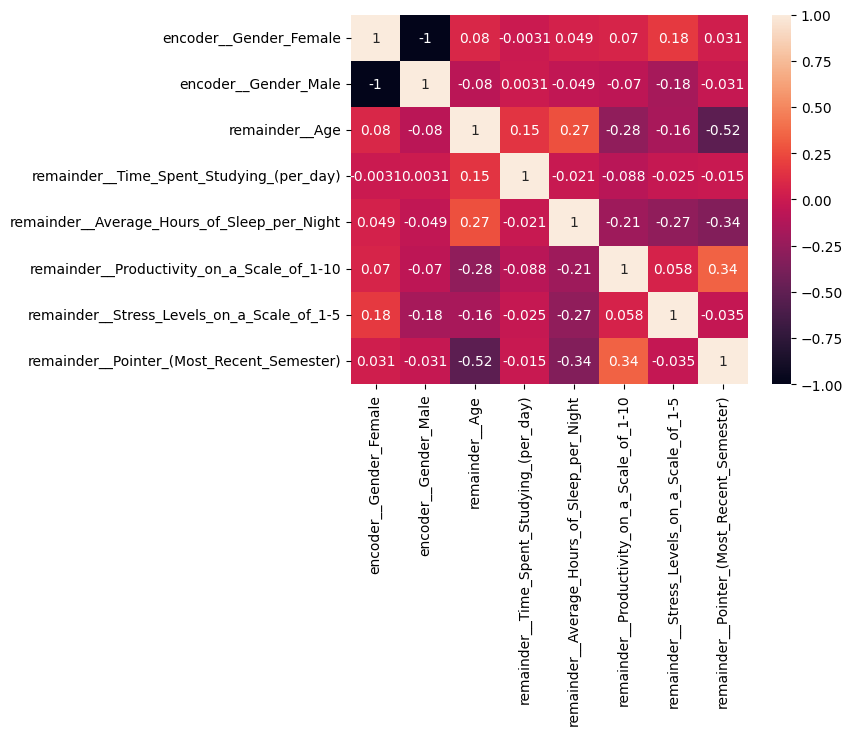

In [79]:
sns.heatmap(df_cleaned.corr(), annot = True)

In [80]:
#building a linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [81]:
df_cleaned.columns

Index(['encoder__Gender_Female', 'encoder__Gender_Male', 'remainder__Age',
       'remainder__Time_Spent_Studying_(per_day)',
       'remainder__Average_Hours_of_Sleep_per_Night',
       'remainder__Productivity_on_a_Scale_of_1-10',
       'remainder__Stress_Levels_on_a_Scale_of_1-5',
       'remainder__Pointer_(Most_Recent_Semester)'],
      dtype='object')

In [82]:
X = df_cleaned[['encoder__Gender_Female', 'encoder__Gender_Male', 'remainder__Age',
       'remainder__Time_Spent_Studying_(per_day)',
       'remainder__Average_Hours_of_Sleep_per_Night',
       'remainder__Productivity_on_a_Scale_of_1-10',
       'remainder__Stress_Levels_on_a_Scale_of_1-5']]

Y = df_cleaned['remainder__Pointer_(Most_Recent_Semester)']

In [83]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


regressor = Pipeline(steps=[('regressor', LinearRegression())])
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score:{r2_score(y_test, y_pred)}")

Mean Absolute Error: 0.8561595481694242
Mean Squared Error: 1.815953813961253
R^2 Score:-1.0270918371295776


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)


regressor = Pipeline(steps=[('regressor', LinearRegression())])
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score:{r2_score(y_test, y_pred)}")

Mean Absolute Error: 0.6853548615087122
Mean Squared Error: 1.0818160318576364
R^2 Score:-0.48264128078019164


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)


regressor = Pipeline(steps=[('regressor', LinearRegression())])
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score:{r2_score(y_test, y_pred)}")

Mean Absolute Error: 0.7568210324275146
Mean Squared Error: 0.8979958782845274
R^2 Score:-0.5400500024071886
